<a href="https://colab.research.google.com/github/eco-abhi/Pytorch/blob/main/Pytorch_Linear_Classification_(with_Logits).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCE Loss with Logits

Why?

Numerical Instability.

Exponentiating things leads to very large numbers (larger than a computer can represent)

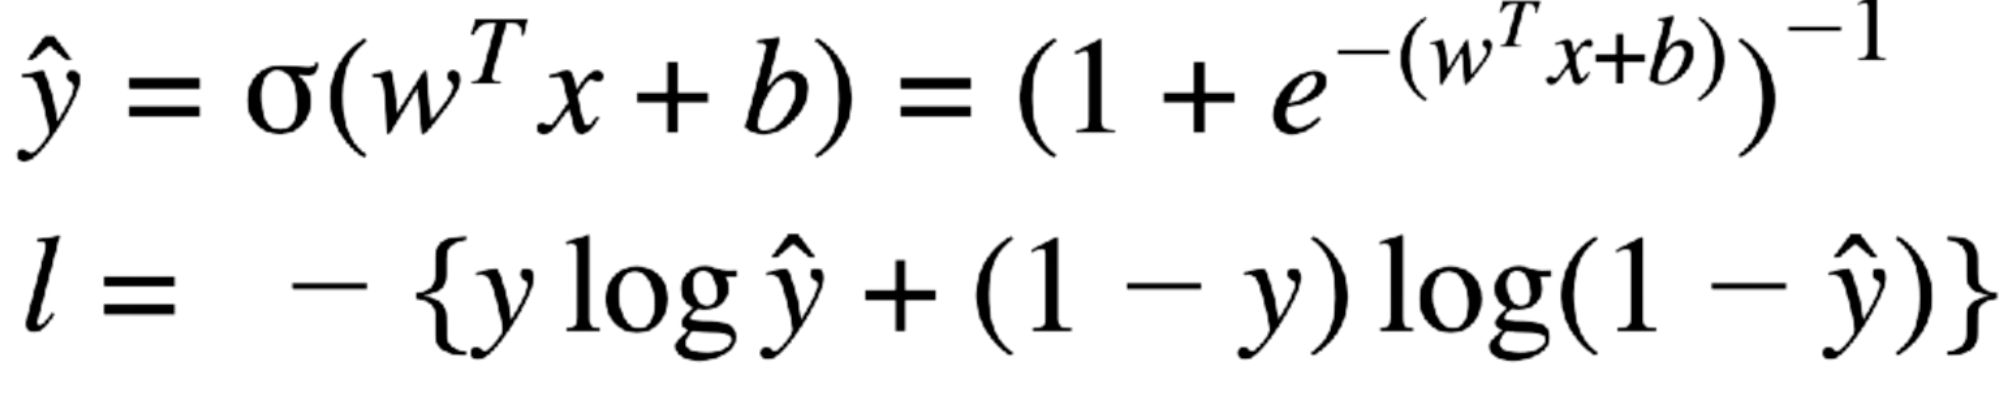

In [2]:
# Import libraries

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [6]:
# Load the data
data = load_breast_cancer()

In [7]:
# Check the type of data
type(data)

sklearn.utils._bunch.Bunch

In [8]:
from sklearn.model_selection import train_test_split

# Split the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)
N, D = X_train.shape

In [9]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Build the model
# We no longer need the sigmoid here since that's included in the cost calculation and therefore the model goes back to being a linear model
# The output of this model is a logit
model =  nn.Linear(D, 1)

In [11]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [12]:
# Convert data into torch tensors
X_train = torch.FloatTensor(X_train.astype(np.float32))
y_train = torch.FloatTensor(y_train.astype(np.float32).reshape(-1, 1))

X_test = torch.FloatTensor(X_test.astype(np.float32))
y_test = torch.FloatTensor(y_test.astype(np.float32).reshape(-1, 1))



In [13]:
# Train the model
n_epochs =  1000

# Store losses
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accs = np.zeros(n_epochs)
test_accs = np.zeros(n_epochs)

# Train the model
for epoch in range(n_epochs):

    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass and loss
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Get test loss
    outputs_test = model(X_test)
    test_loss = criterion(outputs_test, y_test)

    # Save losses
    train_losses[epoch] = loss.item()
    test_losses[epoch] = test_loss.item()

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch 1/1000, Train Loss: 0.9002, Test Loss: 0.8581
Epoch 2/1000, Train Loss: 0.8916, Test Loss: 0.8496
Epoch 3/1000, Train Loss: 0.8830, Test Loss: 0.8413
Epoch 4/1000, Train Loss: 0.8745, Test Loss: 0.8330
Epoch 5/1000, Train Loss: 0.8662, Test Loss: 0.8248
Epoch 6/1000, Train Loss: 0.8578, Test Loss: 0.8167
Epoch 7/1000, Train Loss: 0.8496, Test Loss: 0.8087
Epoch 8/1000, Train Loss: 0.8415, Test Loss: 0.8007
Epoch 9/1000, Train Loss: 0.8334, Test Loss: 0.7928
Epoch 10/1000, Train Loss: 0.8254, Test Loss: 0.7850
Epoch 11/1000, Train Loss: 0.8175, Test Loss: 0.7773
Epoch 12/1000, Train Loss: 0.8097, Test Loss: 0.7697
Epoch 13/1000, Train Loss: 0.8020, Test Loss: 0.7621
Epoch 14/1000, Train Loss: 0.7944, Test Loss: 0.7547
Epoch 15/1000, Train Loss: 0.7869, Test Loss: 0.7473
Epoch 16/1000, Train Loss: 0.7794, Test Loss: 0.7400
Epoch 17/1000, Train Loss: 0.7721, Test Loss: 0.7328
Epoch 18/1000, Train Loss: 0.7648, Test Loss: 0.7256
Epoch 19/1000, Train Loss: 0.7576, Test Loss: 0.7186
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

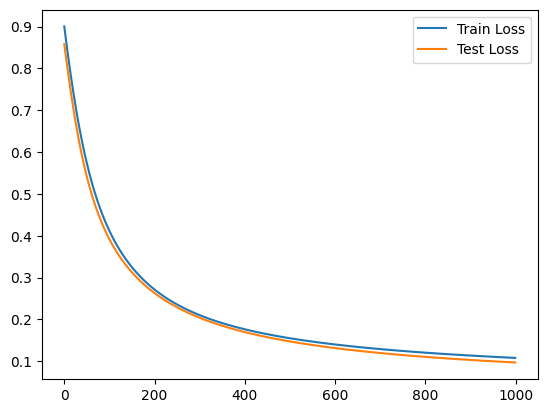

In [14]:
# Plot the train loss and test loss per iteration

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show

In [17]:
# Get accuracy
with torch.no_grad():

    p_train = model(X_train)
    p_train = p_train.numpy() > 0
    train_acc = np.mean(p_train == y_train.numpy())

    p_test = model(X_test)
    p_test = p_test.numpy() > 0
    test_acc = np.mean(p_test == y_test.numpy())

print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

Train Accuracy: 0.9816, Test Accuracy: 0.9894
